## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the information on the newly created merged dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
# Checking the number of mice.

mouse_count = combined_data["Mouse ID"].count()
mouse_count

1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_id = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_id                                                      

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID',])]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.

# 249 based on the number of rows


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

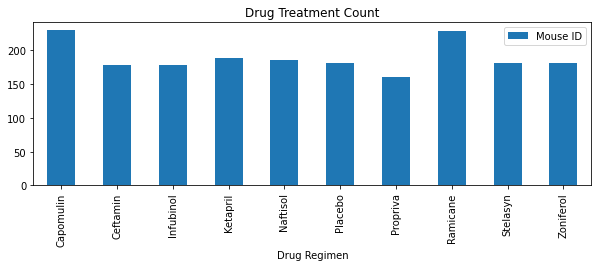

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_data = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen") 

#Creating the bar chart
drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()


In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_list = summary_df.index.tolist()
drug_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

Text(0, 0.5, '')

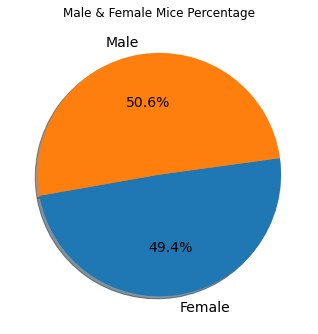

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

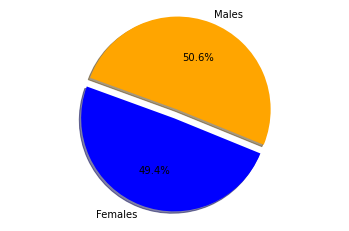

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_data.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Females", "Males"]
colors = ["blue", "orange"]
explode = (0.1, 0)  

#creating the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

combined_data.head()

# Start by getting the last (greatest) timepoint for each mouse

sorted_df = combined_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin= combined_data.loc[(combined_data["Drug Regimen"]=="Capomulin")]

#counts are different
capomulin_grouped=capomulin.groupby("Timepoint")
time_counts=capomulin_grouped["Mouse ID"].count()

capomulin.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [24]:

#Group the capomulin data by Mouse ID
capomulin_mouse_grouped=capomulin.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_capomulin=capomulin_mouse_grouped["Timepoint"].max()

tumor_size= pd.DataFrame()

for idx in max_tp_capomulin.index:
    tumor_row=capomulin.loc[(capomulin["Mouse ID"]==idx)&(capomulin["Timepoint"]==max_tp_capomulin[idx])]
    tumor_size = tumor_size.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))


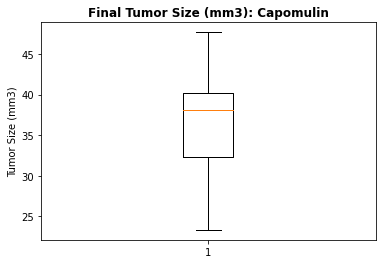

In [25]:

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. - Capomulin
#Calculate the IQR and quantitatively determine if there are any potential outliers.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Capomulin',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(tumor_size["Tumor Volume (mm3)"])
plt.show()

In [26]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumor_size["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor size is: 32.37735684
The upper quartile of tumor size is: 40.1592203
The interquartile range of tumor size is: 7.781863460000004
The the median of tumor size is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [ ]:
tumor_size_sorted=tumor_size["Tumor Volume (mm3)"].sort_values(ascending=False)
capomulin_outliers=tumor_size.loc[(tumor_size["Tumor Volume (mm3)"]<lower_bound)|(tumor_size["Tumor Volume (mm3)"]>upper_bound)]
#capomulin_outliers
#capomulin_tumor_sorted

In [27]:
# Box plot for Ramicane

#isolate all of the data for the drug Ramicane
ramicane=combined_data.loc[(combined_data["Drug Regimen"]=="Ramicane")]
#Group the Ramicane data by Mouse ID
ramicane_mouse_grouped=ramicane.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_ramicane=ramicane_mouse_grouped["Timepoint"].max()


In [28]:

ramicane_tumor= pd.DataFrame()

for idx in max_tp_ramicane.index:
    tumor_row=ramicane.loc[(ramicane["Mouse ID"]==idx)&(ramicane["Timepoint"]==max_tp_ramicane[idx])]
    ramicane_tumor = ramicane_tumor.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))

ramicane_tumor.head()

,Tumor Volume (mm3)
327,38.407618
430,43.047543
214,38.810366
174,32.978522
289,38.342008


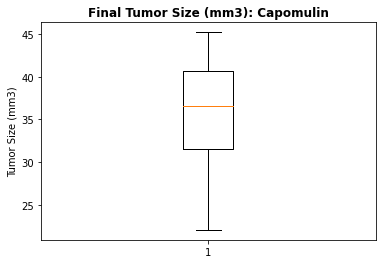

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#ramicane_data=ramicane_tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Capomulin',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(ramicane_tumor["Tumor Volume (mm3)"])
plt.show()

In [30]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ramicane_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor size is: 31.56046955
The upper quartile of tumor size is: 40.65900627
The interquartile range of tumor size is: 9.098536719999998
The the median of tumor size is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [ ]:
ramicane_tumor_sorted=ramicane_tumor["Tumor Volume (mm3)"].sort_values(ascending=False)
ramicane_outliers=ramicane_tumor.loc[(ramicane_tumor["Tumor Volume (mm3)"]<lower_bound)|(ramicane_tumor["Tumor Volume (mm3)"]>upper_bound)]
#ramicane_outliers
#ramicane_tumor_sorted

In [32]:
#box plot for Propriva
#isolate all of the data for the drug Propriva
propriva=combined_data.loc[(combined_data["Drug Regimen"]=="Propriva")]
#Group the Propriva data by Mouse ID
propriva_mouse_grouped=propriva.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_propriva=propriva_mouse_grouped["Timepoint"].max()
propriva.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
542,a699,Propriva,Female,5,28,5,46.553090,0
543,a699,Propriva,Female,5,28,10,47.867376,0
544,a699,Propriva,Female,5,28,15,49.530401,0
545,a699,Propriva,Female,5,28,20,50.712423,0


In [33]:
propriva_tumor= pd.DataFrame()

for idx in max_tp_propriva.index:
    tumor_row=propriva.loc[(propriva["Mouse ID"]==idx)&(propriva["Timepoint"]==max_tp_propriva[idx])]
    propriva_tumor = propriva_tumor.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))

propriva_tumor.head()

,Tumor Volume (mm3)
550,62.191414
751,64.183229
893,61.774963
903,70.492788
920,62.570880


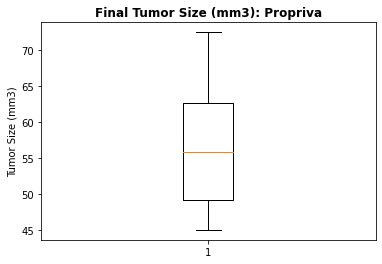

In [34]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#propriva_data=propriva_tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Propriva',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(propriva_tumor["Tumor Volume (mm3)"])
plt.show()

In [35]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = propriva_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor size is: 49.12296898
The upper quartile of tumor size is: 62.57087961
The interquartile range of tumor size is: 13.447910629999996
The the median of tumor size is: 55.84141007 
Values below 28.95110303500001 could be outliers.
Values above 82.742745555 could be outliers.


In [36]:
propriva_tumor_sorted=propriva_tumor["Tumor Volume (mm3)"].sort_values(ascending=False)
propriva_outliers=propriva_tumor.loc[(propriva_tumor["Tumor Volume (mm3)"]<lower_bound)|(propriva_tumor["Tumor Volume (mm3)"]>upper_bound)]
#ceftamin_outliers
#ceftamin_tumor_sorted

In [38]:
#Box plot for Ceftamin

#isolate all of the data for the drug ceftamin
ceftamin=combined_data.loc[(combined_data["Drug Regimen"]=="Ceftamin")]
#Group the ceftamin data by Mouse ID
ceftamin_mouse_grouped=ceftamin.groupby("Mouse ID")
#calculate the max timepoint, index is mouse ID, and column value is max timepoint
max_tp_ceftamin=ceftamin_mouse_grouped["Timepoint"].max()
ceftamin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [39]:
ceftamin_tumor= pd.DataFrame()

for idx in max_tp_ceftamin.index:
    tumor_row=ceftamin.loc[(ceftamin["Mouse ID"]==idx)&(ceftamin["Timepoint"]==max_tp_ceftamin[idx])]
    ceftamin_tumor = ceftamin_tumor.append(pd.DataFrame(tumor_row["Tumor Volume (mm3)"]))

ceftamin_tumor.head()

,Tumor Volume (mm3)
493,62.999356
594,45.000000
600,56.057749
617,55.742829
840,48.722078


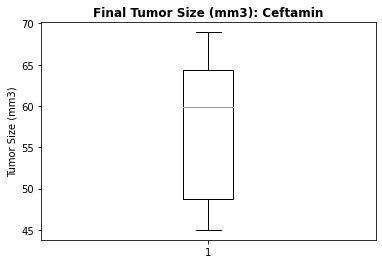

In [40]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#ceftamin_data=propriva_tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3): Ceftamin',weight="bold")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(ceftamin_tumor["Tumor Volume (mm3)"])
plt.show()

In [41]:
#If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ceftamin_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor size is: 48.72207785
The upper quartile of tumor size is: 64.29983003
The interquartile range of tumor size is: 15.577752179999997
The the median of tumor size is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Line and Scatter Plots

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_mouse=combined_data.loc[(combined_data["Drug Regimen"]=="Capomulin")&(combined_data["Mouse ID"]=="s185")]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


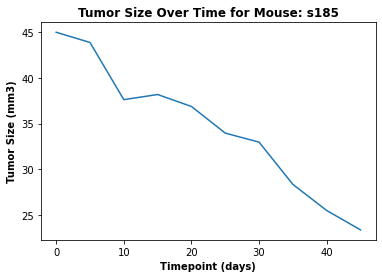

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint_x=capomulin_mouse["Timepoint"]
tumorsize_y=capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(timepoint_x,tumorsize_y);
plt.xlabel("Timepoint (days)",weight="bold");
plt.ylabel("Tumor Size (mm3)",weight="bold");
plt.title("Tumor Size Over Time for Mouse: s185",weight="bold");

## Correlation and Regression

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#group capomulin datafram by mouse id 
mouse_grouped=capomulin.groupby("Mouse ID")
#create a series for the weight of each mouse
mouse_weight=mouse_grouped["Weight (g)"].mean()
#create a series for the average tumor volume of each mouse
avg_tumor=mouse_grouped["Tumor Volume (mm3)"].mean()

The r-squared is: 0.8419363424694718
y = 0.95x + 21.55


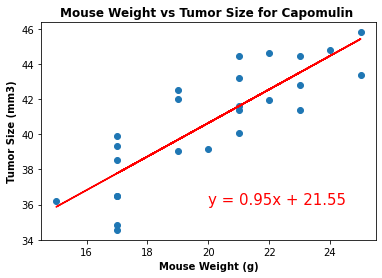

In [54]:
plt.scatter(mouse_weight,avg_tumor,marker="o");
plt.xlabel("Mouse Weight (g)",weight="bold");
plt.ylabel("Tumor Size (mm3)",weight="bold");
plt.title("Mouse Weight vs Tumor Size for Capomulin ",weight="bold");

#Calculate the linear regression values to be plotted against weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the regression values to form the regression line
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red");

print(f"The r-squared is: {rvalue}")
print(line_eq)
